# Regresión Lineal Costo de un Incidente de Seguridad 

En este ejercicio se explican los fundamentos de la regresion lineal aplicada a un caso sencillo relacionando con la CyberSeguridad.

### Enunciado del Ejercicio 

EL ejercicio consiste en predecir el csoto de un incidente de seguridad en base a número de equipos afectados. El conjunto de datos es generado de manera aleatoria. 


## 1.-Generación del DataSet

In [1]:
import numpy as np 


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X +np.random.randn(100, 1)

print("La Longitud del DataSet es: ",len(X))

La Longitud del DataSet es:  100


## 2.- Visualización del DataSet 

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline

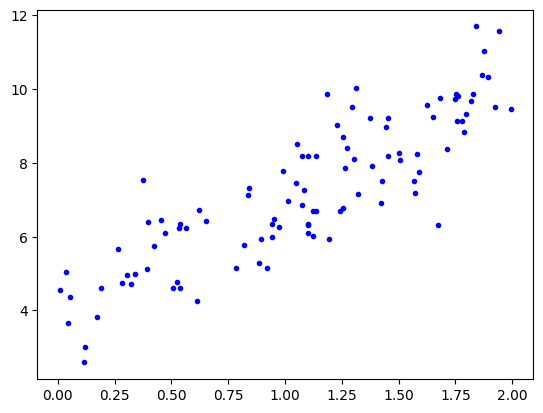

In [3]:
plt.plot(X,y, "b.")
plt.show()

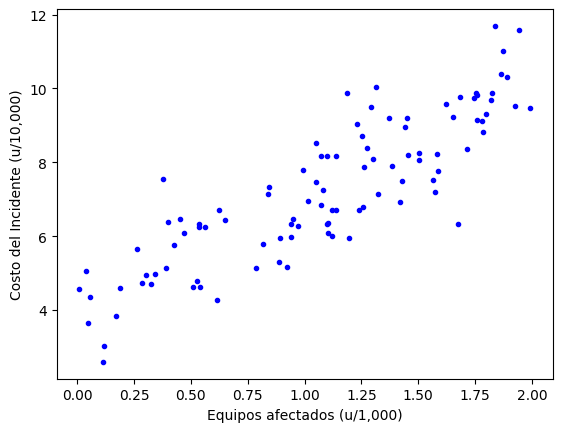

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del Incidente (u/10,000)")
plt.show()

### 3.- Modificación del DataSet

In [5]:
import pandas as pd

data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.302847,4.955373
1,1.825960,9.869906
2,1.302208,8.090640
3,0.038625,5.043540
4,1.101759,6.089759
5,1.255013,8.702906
6,1.865518,10.379819
7,1.839052,11.690770
8,1.013872,6.962901
9,0.324014,4.712597


In [6]:
# Escalando el número de Equipos Afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype(int)

# Escalado del costo 
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype(int)

df.head(10)

,No_Equipos_Afectados,Costo
0,302,49553
1,1825,98699
2,1302,80906
3,38,50435
4,1101,60897
5,1255,87029
6,1865,103798
7,1839,116907
8,1013,69629
9,324,47125


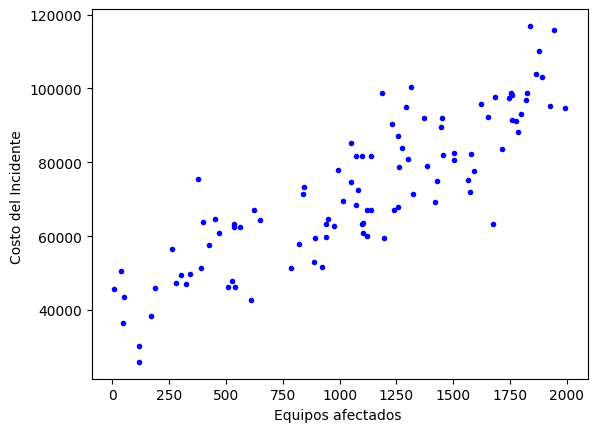

In [7]:
# Representacion grafica del DataSet
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados ")
plt.ylabel("Costo del Incidente ")
plt.show()

## 4.- Construcción del Modelo

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# Construcción del Modelo y ajuste de la función de Hipótesis 
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Obetencion Theta 0

lin_reg.intercept_

np.float64(39108.05301359082)

In [11]:
# Parametro Theta 1
lin_reg.coef_

array([30.8467053])

In [12]:
# Prediccion para el valor mínimo y máximo del DataSet de entrenamiento
x_min_max = np.array([[df['No_Equipos_Afectados'].min()],[df['No_Equipos_Afectados'].max()]])
y_train_pred = lin_reg.predict(x_min_max)

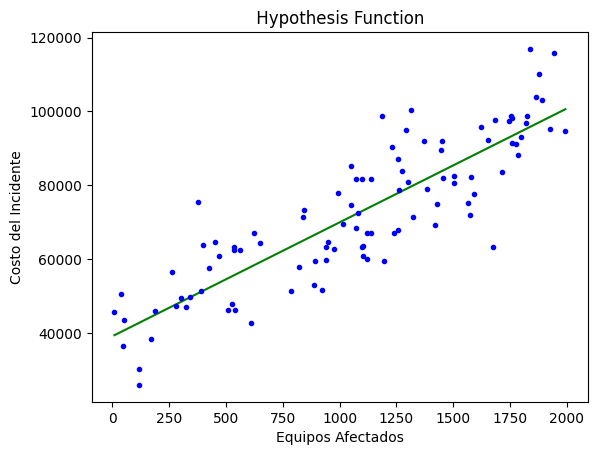

In [13]:
# Representacion gráfica de la función de Hipótesis generada
# Datos de la gráfica
plt.title(" Hypothesis Function ")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")

# Gráficacion de los datos y función 
plt.plot(x_min_max, y_train_pred, 'g-' )
plt.plot(df['No_Equipos_Afectados'],df['Costo'], 'b.')
plt.show()

## 5.- Predicción de nuevos ejemplos

In [14]:
x_new = np.array([[3000]]) #1500 EQUIPOS AFECTADOS

# Prediccioón del costo que tendria el indidente 
costo = lin_reg.predict(x_new)
print("El costo del incidente seria: $", int(costo[0]))

El costo del incidente seria: $ 131648


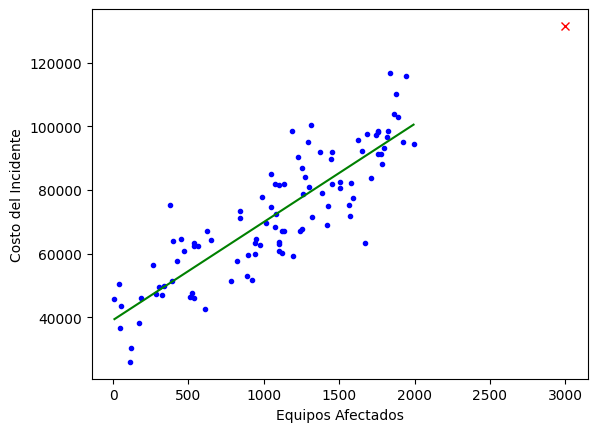

In [15]:
plt.plot(df['No_Equipos_Afectados'],df['Costo'], 'b.')
plt.plot(x_min_max, y_train_pred, 'g-' )
plt.plot(x_new, costo, "rx")

plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()